In [1]:
import psycopg2
import pandas as pd

# Define the database connection parameters
host = "database-1.cudlkdpouzkp.eu-north-1.rds.amazonaws.com"
port = "5432"
dbname = "Pneumonia"
user = "postgres"
password = "123456789"

# Connect to the database
conn = psycopg2.connect(host = host, port = port, dbname = dbname, user = user, password = password)

doctor_query = "SELECT * FROM doctor"
patient_query = "SELECT * FROM patient"
diseases_query = "SELECT * FROM diseases"
imagelabel_query = "SELECT * FROM imagelabel"
medicalresult_query = "SELECT * FROM medicalresult"
survay_result_query = "SELECT * FROM survey_results"

# Execute the queries and store the results in pandas dataframes
doctor_df = pd.read_sql(doctor_query, conn)
patient_df = pd.read_sql(patient_query, conn)
diseases_df = pd.read_sql(diseases_query, conn)
imagelabel_df = pd.read_sql(imagelabel_query, conn)
medicalresult_df = pd.read_sql(medicalresult_query, conn)
survay_result_df = pd.read_sql(survay_result_query, conn)


c:\Users\sohil\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\sohil\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\sohil\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\sohil\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqli

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Prepare Data for Analysis (Preprocessing Data)

# Doctor Table

In [3]:
doctor_df.head(7)


,nid,name,phone,address,age,password
0,20301548520137,Karma Ali,01236548520,Mansoura,30,df55
1,20315059632104,Muhra Malek,01152480236,Cairo,31,3625ll
2,20102365215422,Hamza Khaled,01025879631,Assuit,45,985ghj
3,01025485236541,Ahmed Mahmoud,01002542023,Luxor,34,25841cd
4,20103654852012,Nour Mohamed,01022554102,Dahab,50,25845sd
5,20152563201253,Zain Ali,01024586351,Mallawi,28,25463
6,30215252153652,Ahmed Ibrahim,01025463250,Minia,50,96658


In [4]:
doctor_df.dtypes

nid         object
name        object
phone       object
address     object
age          int64
password    object
dtype: object

### Remove any characters in national id

In [98]:
doctor_df['nid'] = doctor_df['nid'].str.replace(r'\D', '')
doctor_df['nid'].head()

KeyError: 'nid'

### Data types

In [6]:
doctor_df.dtypes

nid         object
name        object
phone       object
address     object
age          int64
password    object
dtype: object

In [7]:
doctor_df.rename(columns = {'nid': 'National_ID', 'name' : 'Name',
                            'phone' : 'Phone', 'address' : 'Address',
                            'age' :'Age', 'p_ind' : 'Patient_ID' }, inplace=True)

In [8]:
doctor_df.head(7)

,National_ID,Name,Phone,Address,Age,password
0,20301548520137,Karma Ali,01236548520,Mansoura,30,df55
1,20315059632104,Muhra Malek,01152480236,Cairo,31,3625ll
2,20102365215422,Hamza Khaled,01025879631,Assuit,45,985ghj
3,01025485236541,Ahmed Mahmoud,01002542023,Luxor,34,25841cd
4,20103654852012,Nour Mohamed,01022554102,Dahab,50,25845sd
5,20152563201253,Zain Ali,01024586351,Mallawi,28,25463
6,30215252153652,Ahmed Ibrahim,01025463250,Minia,50,96658


In [9]:
doctor_df.columns

Index(['National_ID', 'Name', 'Phone', 'Address', 'Age', 'password'], dtype='object')

In [10]:
doctor_df.Name = doctor_df.Name.str.title()
doctor_df.Name.head(7)

0        Karma Ali
1      Muhra Malek
2     Hamza Khaled
3    Ahmed Mahmoud
4     Nour Mohamed
5         Zain Ali
6    Ahmed Ibrahim
Name: Name, dtype: object

In [11]:
doctor_df.Address = doctor_df.Address.str.title()
doctor_df.Address

0         Mansoura
1            Cairo
2           Assuit
3            Luxor
4            Dahab
5          Mallawi
6            Minia
7            Aswan
8            Sohag
9            Minia
10           Cairo
11      Alexandria
12          Assuit
13         Red Sea
14           Luxor
15    َََPort Said
16      Alexandria
17           Minya
Name: Address, dtype: object

## Missing values

In [12]:
# Check if current data contains any missing values
doctor_df.isnull().any()

National_ID    False
Name           False
Phone          False
Address        False
Age            False
password       False
dtype: bool

### Fillin Missing values of Address
- Fill null in Address with the most frequent address in the data
- Fill null in Age with the Average address in the data


In [13]:
# compute the most frequent value in column 'Address'
most_frequent_value = doctor_df['Address'].mode()[0]

# fill missing values in column 'Address' with the most frequent value
doctor_df['Address'] = doctor_df['Address'].fillna(most_frequent_value)

# print the updated DataFrame
doctor_df['Address'].head(7)

0    Mansoura
1       Cairo
2      Assuit
3       Luxor
4       Dahab
5     Mallawi
6       Minia
Name: Address, dtype: object

In [14]:
# compute the mean value in column 'Age'
mean_doctor_age = doctor_df['Age'].mean()

# fill missing values in column 'Age' with the Average
doctor_df['Age'] = doctor_df['Age'].fillna(mean_doctor_age)

# print the updated DataFrame
doctor_df['Age'].head(7)

0    30
1    31
2    45
3    34
4    50
5    28
6    50
Name: Age, dtype: int64

## Outliers

#### Age of doctors plot before removing outlier

c:\Users\sohil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sohil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


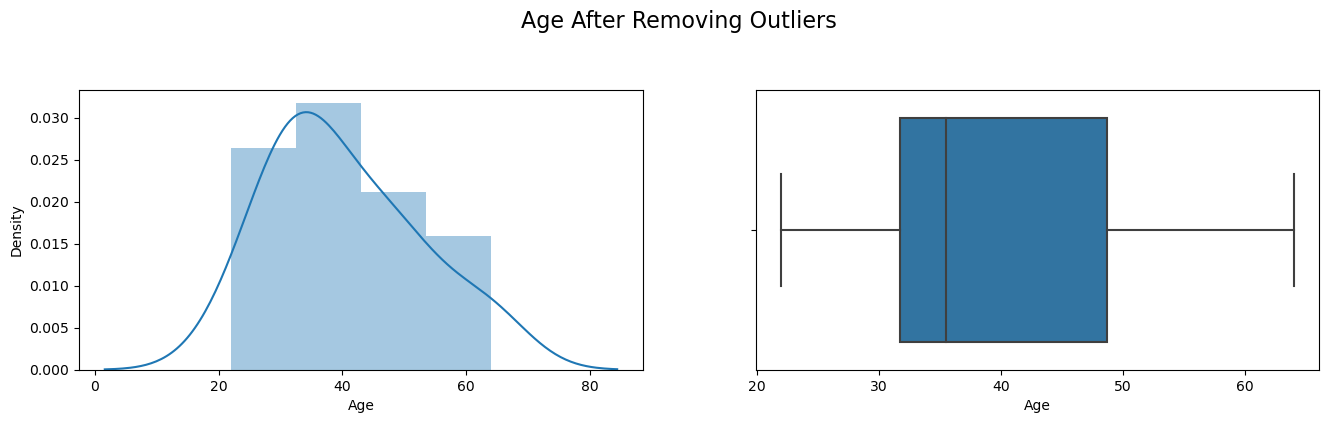

In [15]:
# Plot Age Distribution with outliers in Age Column
plt.figure(figsize=(16,8))
# add title to the entire figure
plt.suptitle('Age After Removing Outliers', fontsize=16)
plt.subplot(2,2,1)
sns.distplot(doctor_df['Age'])
plt.subplot(2,2,2)
sns.boxplot(doctor_df['Age'])
plt.show()

## Normalization

In [16]:
# Z score
doctor_df['Age_Normalization'] = np.abs(stats.zscore(doctor_df['Age'])).round(2)
doctor_df['Age_Normalization'].head(7)

0    0.87
1    0.79
2    0.40
3    0.53
4    0.83
5    1.04
6    0.83
Name: Age_Normalization, dtype: float64

In [17]:
z_doctor_df = doctor_df['Age_Normalization']
print(np.where(z_doctor_df > 2))

(array([14], dtype=int64),)


### Age for doctors
- 1: Older adults (65 and older)
- 2: Adults (18 years or older) 

In [18]:
def age_stage(age):
    if age < 65:
        return 'Adult'
    else:
        return 'Older'

In [19]:
doctor_df["Age_Stage"] = doctor_df["Age"].apply(age_stage)
doctor_df.head(7)

,National_ID,Name,Phone,Address,Age,password,Age_Normalization,Age_Stage
0,20301548520137,Karma Ali,01236548520,Mansoura,30,df55,0.87,Adult
1,20315059632104,Muhra Malek,01152480236,Cairo,31,3625ll,0.79,Adult
2,20102365215422,Hamza Khaled,01025879631,Assuit,45,985ghj,0.40,Adult
3,01025485236541,Ahmed Mahmoud,01002542023,Luxor,34,25841cd,0.53,Adult
4,20103654852012,Nour Mohamed,01022554102,Dahab,50,25845sd,0.83,Adult
5,20152563201253,Zain Ali,01024586351,Mallawi,28,25463,1.04,Adult
6,30215252153652,Ahmed Ibrahim,01025463250,Minia,50,96658,0.83,Adult


### Remove Outlier Values in doctor_df table

In [20]:
# IQR
# Calculate the upper and lower limits
Q1 = doctor_df['Age'].quantile(0.25)
Q3 = doctor_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(doctor_df['Age'] >= upper)[0]
lower_array = np.where(doctor_df['Age'] <= lower)[0]
 
# Removing the outliers
doctor_df.drop(index=upper_array, inplace=True)
doctor_df.drop(index=lower_array, inplace=True)

### doctor_df after removing outlier

c:\Users\sohil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sohil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


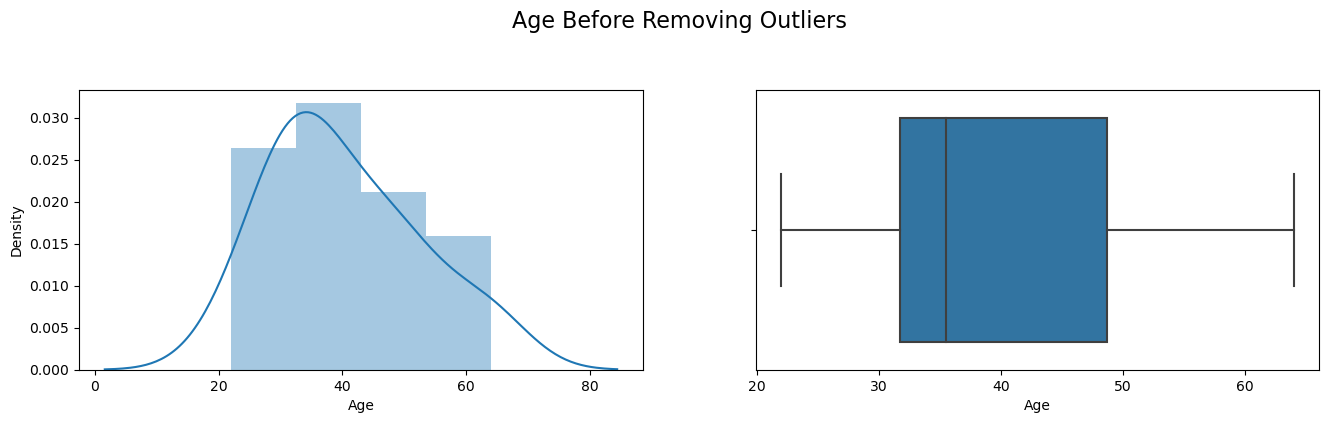

In [21]:
# Plot Age Distribution without outliers in Age Column
plt.figure(figsize=(16,8))
# add title to the entire figure
plt.suptitle('Age Before Removing Outliers', fontsize=16) 
plt.subplot(2,2,1)
sns.distplot(doctor_df['Age'])
plt.subplot(2,2,2)
sns.boxplot(doctor_df['Age'])
plt.show()

In [22]:
# Doctor table before preprocessing and cleaning
doctor_df.head(7)

,National_ID,Name,Phone,Address,Age,password,Age_Normalization,Age_Stage
0,20301548520137,Karma Ali,01236548520,Mansoura,30,df55,0.87,Adult
1,20315059632104,Muhra Malek,01152480236,Cairo,31,3625ll,0.79,Adult
2,20102365215422,Hamza Khaled,01025879631,Assuit,45,985ghj,0.40,Adult
3,01025485236541,Ahmed Mahmoud,01002542023,Luxor,34,25841cd,0.53,Adult
4,20103654852012,Nour Mohamed,01022554102,Dahab,50,25845sd,0.83,Adult
5,20152563201253,Zain Ali,01024586351,Mallawi,28,25463,1.04,Adult
6,30215252153652,Ahmed Ibrahim,01025463250,Minia,50,96658,0.83,Adult


### Save Doctor preprocessed data into csv file

In [23]:
doctor_df.to_csv('Doctor.csv', index=False)

# Patient table 

In [24]:
patient_df.head(7)

,nid,name,phone,age,address,doctor_phone,gender,follower_phone,doctor_nid,password
0,30201548565212,waleed mustafa,01061233642,40,Alexandria,01023625863,M,01236547895,23102158632541,23648
1,30111132400354,Momen,01099473692,22,Minya,123123123,M,01099473695,30111132400353,123eee
2,30111132400355,Momen,01099473692,22,Minya,123123123,M,01099473695,30111132400353,123eee
3,30111132400356,Momen,01099473692,22,Minya,123123123,M,01099473695,30111132400353,123eee
4,30111132400357,Momen,01099473692,22,Minya,123123123,M,01099473695,30111132400353,123eee
5,30111132400351,Momen Khaled,01099473695,25,Minia,01128922921,M,01111111111,None,123
6,20320154852369,Ali Bakr,01025486358,30,mallawi,01258963251,M,01158263541,20152563201253,354


#### Covert Patient name and address as title as each character in the word is capitalized

In [25]:
patient_df.address = patient_df.address.str.title()
patient_df.address

0     Alexandria
1          Minya
2          Minya
3          Minya
4          Minya
5          Minia
6        Mallawi
7          Cairo
8          Minia
9        Mansora
10        Assuit
11         Sohag
12          Giza
13         Minia
14         Cairo
15          Giza
16          Giza
17         Aswan
18         Sohag
19         Minia
20         Cairo
21        Assuit
22       Red Sea
23         Luxor
24     Port Said
25         Cairo
26         Minia
27          Giza
28         Luxor
29          Giza
30         Cairo
31         Minia
32          Giza
33         Minya
34        المنيا
35         اسيوط
Name: address, dtype: object

In [26]:
patient_df.name = patient_df.name.str.title()
patient_df.name

0          Waleed Mustafa
1                   Momen
2                   Momen
3                   Momen
4                   Momen
5            Momen Khaled
6                Ali Bakr
7     Abdelrahman Mohamed
8             Karem Assem
9            Hazem Khaled
10          Mustafa Yahia
11            Gmela Sayed
12          Hager Mohamed
13            Mazen Ahmed
14              Dina Said
15          Ahmed Mahmoud
16          Mazen Mahmoud
17             Ahmed Foad
18         Khaled Mohamed
19            Marwa Ahmed
20           Nada Mahmoud
21       Abdallah Mahmoud
22             Ahmed Adel
23            Mena Ahmed 
24             Arwa Talat
25           Mariam Tarek
26         Mahmoud Farouk
27           Ahmed Safwat
28           Hassan Saleh
29            Belal Naser
30          Laila Mohamed
31           Retag Waleed
32            Yahia Ahmed
33                  Momen
34                على بكر
35                  سعدون
Name: name, dtype: object

### Data types of patient columns

In [27]:
# After processing
patient_df.dtypes

nid               object
name              object
phone             object
age                int64
address           object
doctor_phone      object
gender            object
follower_phone    object
doctor_nid        object
password          object
dtype: object

In [28]:
# Remove any characters from the national id 
patient_df['nid'] = patient_df['nid'].str.replace(r'\D', '')

C:\Users\sohil\AppData\Local\Temp\ipykernel_12776\1549548222.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  patient_df['nid'] = patient_df['nid'].str.replace(r'\D', '')


In [29]:
# Convert Age data type into numeric
patient_df.age = pd.to_numeric(patient_df.age)

In [30]:
# Map 'female' to 1 and 'male' to 0
patient_df['gender'] = patient_df['gender'].map({'F': 1, 
                                                 'M': 0})

In [31]:
# Before proceeding
patient_df.dtypes

nid               object
name              object
phone             object
age                int64
address           object
doctor_phone      object
gender             int64
follower_phone    object
doctor_nid        object
password          object
dtype: object

### Rename columns of data frame

In [99]:
patient_df = patient_df.rename(columns = {'nid': 'Patient_National_ID', 'name':'Name', 'phone':'Phone',
                                          'age':'Age', 'address': 'Address', 'doctor_phone' : 'Doctor_Phone',
                                          'gender':'Gender', 'follower_phone' : 'Follower_Phone'})
patient_df.head()

,Patient_National_ID,Patient_Name,Patient_Phone,Patient_Age,Patient_Address,Doctor_Phone,Patient_Gender,Follower_Phone,Doctor_National_ID,password,Age_Normalization_Patient,Patient_Age_Stage
0,30201548565212,Waleed Mustafa,01061233642,40,Alexandria,01023625863,0,01236547895,23102158632541,23648,0.36,Adult
1,30111132400354,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
2,30111132400355,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
3,30111132400356,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
4,30111132400357,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult


### Normalization

Normalization is the process of transforming values of several features (variables) into a similar range, normalization helps make comparisons between different variables more *fair*. Using **Standardization (Z-score)** in analysis
* **Standardization (Z-score)**: subtract the mean ($\mu$) of the feature and divide by the standard deviation ($\sigma$).
$$x_{new} = \frac{x_{old} - \mu}{\sigma}$$

In [100]:
# Z score
patient_df['Age_Normalization_Patient'] = np.abs(stats.zscore(patient_df['Age'])).round(2)
patient_df['Age_Normalization_Patient'].head()

KeyError: 'Age'

##### **Patient Age** 
- 1: Older adults (65 and older)
- 2: Adults (18 years or older) 
- 3: Adolescents (13 years through 17 years. They may also be referred to as teenagers depending on the context). 

In [34]:
def age_stage_Patient(age):
    if age < 18:
        return 'Adolescent'
    elif age > 18 & age < 65:
        return 'Adult'
    else:
        return 'Older'

In [35]:
patient_df["Age_Stage"] = patient_df["Age"].apply(age_stage_Patient)
patient_df.head(7)

,National_ID,Name,Phone,Age,Address,Doctor_Phone,Gender,Follower_Phone,doctor_nid,password,Age_Normalization_Patient,Age_Stage
0,30201548565212,Waleed Mustafa,01061233642,40,Alexandria,01023625863,0,01236547895,23102158632541,23648,0.36,Adult
1,30111132400354,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
2,30111132400355,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
3,30111132400356,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
4,30111132400357,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
5,30111132400351,Momen Khaled,01099473695,25,Minia,01128922921,0,01111111111,None,123,0.68,Adult
6,20320154852369,Ali Bakr,01025486358,30,Mallawi,01258963251,0,01158263541,20152563201253,354,0.33,Adult


### Remove Outlier Values in patient_df table

In [36]:
# output of the outliers
z_patient_df = patient_df['Age_Normalization_Patient']
print(np.where(z_patient_df > 2))

(array([14, 17], dtype=int64),)


In [37]:
# IQR
# Calculate the upper and lower limits
Q1 = patient_df['Age'].quantile(0.25)
Q3 = patient_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(patient_df['Age'] >= upper)[0]
lower_array = np.where(patient_df['Age'] <= lower)[0]
 
# Removing the outliers
patient_df.drop(index=upper_array, inplace=True)
patient_df.drop(index=lower_array, inplace=True)

In [38]:
# Print new shape of patient_df 
patient_df.shape

(35, 12)

### Fillin Missing values of Address
- Fill null with the most frequent address in the data
- Fill null values of age with average age

In [39]:
# compute the most frequent value in column 'Address'
most_frequent_value = patient_df['Address'].mode()[0]

# fill missing values in column 'Address' with the most frequent value
patient_df['Address'] = patient_df['Address'].fillna(most_frequent_value)

# print the updated DataFrame
patient_df['Address'].head(7)

0    Alexandria
1         Minya
2         Minya
3         Minya
4         Minya
5         Minia
6       Mallawi
Name: Address, dtype: object

In [40]:
# compute the meab value in column 'Age'
mean_patient = patient_df['Age'].mean()

# fill missing values in column 'Age' with the mean value
patient_df['Age'] = patient_df['Age'].fillna(mean_patient)

# print the updated DataFrame
patient_df['Age'].head(7)

0    40
1    22
2    22
3    22
4    22
5    25
6    30
Name: Age, dtype: int64

In [41]:
# Patient table before processing and cleaning
patient_df.head(7)

,National_ID,Name,Phone,Age,Address,Doctor_Phone,Gender,Follower_Phone,doctor_nid,password,Age_Normalization_Patient,Age_Stage
0,30201548565212,Waleed Mustafa,01061233642,40,Alexandria,01023625863,0,01236547895,23102158632541,23648,0.36,Adult
1,30111132400354,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
2,30111132400355,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
3,30111132400356,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
4,30111132400357,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
5,30111132400351,Momen Khaled,01099473695,25,Minia,01128922921,0,01111111111,None,123,0.68,Adult
6,20320154852369,Ali Bakr,01025486358,30,Mallawi,01258963251,0,01158263541,20152563201253,354,0.33,Adult


## Save Patient data into CSV file

In [42]:
patient_df.to_csv('Patient.csv', index=False)

# Diseases table

In [43]:
diseases_df.head(7)

,d_id,diabetes,hypertention,cholesterol,p_nid
0,1001,1,0,1,20320154852369
1,1002,0,0,0,30201548596352
2,1003,1,1,1,30245849635712
3,1004,0,0,1,42589635715284
4,1005,1,0,0,20301548967415
5,1006,1,1,0,25352015984520
6,1007,0,0,1,40475302156985


### Datatypes of Diseases columns

In [44]:
# After processing
diseases_df.dtypes


d_id             int64
diabetes         int64
hypertention     int64
cholesterol      int64
p_nid           object
dtype: object

In [45]:
# Convert each data type into suitable format
diseases_df.diabetes = diseases_df.diabetes.astype(bool)
diseases_df.hypertention = diseases_df.hypertention.astype(bool)
diseases_df.cholesterol = diseases_df.cholesterol.astype(bool)


In [46]:
# Before proceeding
diseases_df.dtypes

d_id             int64
diabetes          bool
hypertention      bool
cholesterol       bool
p_nid           object
dtype: object

### Rename columns of diseases data frame

In [47]:
diseases_df = diseases_df.rename(columns = {'d_id': 'Doctor_ID', 'diabetes' : 'Diabetic', 
                                            'hypertention' : 'Hypertension', 'cholesterol': 'Cholesterol',
                                            'p_nid' : 'Patient_National_ID'})


## Missing Values

In [48]:
diseases_df.isnull().any()

Doctor_ID              False
Diabetic               False
Hypertension           False
Cholesterol            False
Patient_National_ID    False
dtype: bool

#### Filling missing values with most frequent values in column

#### 1. Diabetic

In [49]:
# compute the most frequent value in column 'Diabetic'
diabetic_most_freq = diseases_df['Diabetic'].mode()[0]

# fill missing values in column 'Diabetic' with the most frequent value
diseases_df['Diabetic'] = diseases_df['Diabetic'].fillna(diabetic_most_freq)

# print the updated DataFrame
print(diseases_df['Diabetic'].head(7))

0     True
1    False
2     True
3    False
4     True
5     True
6    False
Name: Diabetic, dtype: bool


#### 2. Hypertension

In [50]:
# compute the most frequent value in column 'Hypertension'
Hypertension_most_freq = diseases_df['Hypertension'].mode()[0]

# fill missing values in column 'Hypertension' with the most frequent value
diseases_df['Hypertension'] = diseases_df['Hypertension'].fillna(Hypertension_most_freq)

# print the updated DataFrame
print(diseases_df['Hypertension'].head(7))

0    False
1    False
2     True
3    False
4    False
5     True
6    False
Name: Hypertension, dtype: bool


#### 3. Cholesterol

In [51]:
# compute the most frequent value in column 'Cholesterol'
Cholesterol_most_freq = diseases_df['Cholesterol'].mode()[0]

# fill missing values in column 'Cholesterol' with the most frequent value
diseases_df['Cholesterol'] = diseases_df['Cholesterol'].fillna(Cholesterol_most_freq)

# print the updated DataFrame
print(diseases_df['Cholesterol'].head(7))

0     True
1    False
2     True
3     True
4    False
5    False
6     True
Name: Cholesterol, dtype: bool


In [52]:
# Diseases table before processing and cleaning
diseases_df.head(7)

,Doctor_ID,Diabetic,Hypertension,Cholesterol,Patient_National_ID
0,1001,True,False,True,20320154852369
1,1002,False,False,False,30201548596352
2,1003,True,True,True,30245849635712
3,1004,False,False,True,42589635715284
4,1005,True,False,False,20301548967415
5,1006,True,True,False,25352015984520
6,1007,False,False,True,40475302156985


#### Save Preprocessed diseases_df into csv file

In [53]:
diseases_df.to_csv('Diseases.csv', index=False)

# Medical Result table

In [54]:
medicalresult_df.head(7)

,id,xray_result,xray_date,p_nid
0,5421,1,2020-12-04,30201548596352
1,5422,0,2021-04-05,30245849635712
2,5423,1,2022-06-30,42589635715284
3,5424,1,2023-05-01,20301548967415
4,5425,0,2021-08-14,25352015984520
5,5426,1,2020-01-16,40475302156985
6,4508,0,2022-04-20,30111132400351


In [55]:
# After processing
medicalresult_df.dtypes

id              int64
xray_result     int64
xray_date      object
p_nid          object
dtype: object

In [56]:
medicalresult_df.xray_date =  pd.to_datetime(medicalresult_df.xray_date)

### Missing values in Medical Result:

In [57]:
medicalresult_df = medicalresult_df.dropna(subset = ['xray_result'])
medicalresult_df.head(5)

,id,xray_result,xray_date,p_nid
0,5421,1,2020-12-04,30201548596352
1,5422,0,2021-04-05,30245849635712
2,5423,1,2022-06-30,42589635715284
3,5424,1,2023-05-01,20301548967415
4,5425,0,2021-08-14,25352015984520


### Rename columns of table

In [58]:
medicalresult_df = medicalresult_df.rename(columns = {'id':'Result_ID', 'xray_result': 'Result',
                                                      'xray_date':'Date', 'p_nid':'Patient_ID'})


In [59]:
medicalresult_df.columns


Index(['Result_ID', 'Result', 'Date', 'Patient_ID'], dtype='object')

### From Date columns, add year and month columns values

In [60]:
medicalresult_df['Medical_Result_Year'] = medicalresult_df.Date.dt.year

In [61]:
medicalresult_df['Medical_Result_Month'] = medicalresult_df.Date.dt.month

### Check missing values

In [62]:
medicalresult_df.isnull().any()

Result_ID               False
Result                  False
Date                    False
Patient_ID              False
Medical_Result_Year     False
Medical_Result_Month    False
dtype: bool

#### Save Preprocessed diseases_df into csv file

In [63]:
medicalresult_df.to_csv('MedicalResult.csv', index=False)

# Survay Result Table

In [101]:
survay_result_df.head()

,survey_id,q_one,q_two,q_three,q_four,q_five,q_six,q_seven,q_eight,q_nine,q_ten,survey_date,Patient_National_ID,Survay_Result_Month,Survay_Result_Year
0,4523,1,1,1,0,1,0,0,0,1,0,2022-02-22,42589635715284,2,2022
1,4525,0,1,1,0,1,0,1,1,0,0,2023-03-08,25352015984520,3,2023
2,4526,0,0,1,0,1,0,1,1,0,0,2019-11-11,40475302156985,11,2019
3,4508,1,0,1,0,0,1,0,0,1,0,2022-04-20,30111132400351,4,2022
4,4509,0,1,0,1,0,1,0,0,0,0,2022-05-15,20320154852369,5,2022


### From Date columns, add values of year and month in new columns

In [65]:
survay_result_df.survey_date =  pd.to_datetime(survay_result_df.survey_date	)

In [66]:
survay_result_df['Survay_Result_Month'] = survay_result_df.survey_date.dt.month

In [67]:
survay_result_df['Survay_Result_Year'] = survay_result_df.survey_date.dt.year

In [68]:
survay_result_df.columns

Index(['survey_id', 'q_one', 'q_two', 'q_three', 'q_four', 'q_five', 'q_six',
       'q_seven', 'q_eight', 'q_nine', 'q_ten', 'survey_date', 'p_nid',
       'Survay_Result_Month', 'Survay_Result_Year'],
      dtype='object')

### Check Missing Values

In [69]:
survay_result_df.isnull().any().sum()

0

In [70]:
survay_result_df.isnull().any()

survey_id              False
q_one                  False
q_two                  False
q_three                False
q_four                 False
q_five                 False
q_six                  False
q_seven                False
q_eight                False
q_nine                 False
q_ten                  False
survey_date            False
p_nid                  False
Survay_Result_Month    False
Survay_Result_Year     False
dtype: bool

### Filling missing values in each questions' Survey column with the most frequent value

In [71]:
for col in survay_result_df.columns:
    # check if column contains boolean values
    if survay_result_df[col].dtype == bool:  
        # compute the most frequent value
        most_frequent_value = survay_result_df[col].mode()[0]  
        # fill missing values with the most frequent value
        survay_result_df[col] = survay_result_df[col].fillna(most_frequent_value)  

# print the updated DataFrame
print(survay_result_df.head(7))

   survey_id  q_one  q_two  q_three  q_four  q_five  q_six  q_seven  q_eight  \
0       4523      1      1        1       0       1      0        0        0   
1       4525      0      1        1       0       1      0        1        1   
2       4526      0      0        1       0       1      0        1        1   
3       4508      1      0        1       0       0      1        0        0   
4       4509      0      1        0       1       0      1        0        0   
5       4510      0      0        1       0       1      0        1        1   
6       4511      0      1        0       0       0      1        0        1   

   q_nine  q_ten survey_date           p_nid  Survay_Result_Month  \
0       1      0  2022-02-22  42589635715284                    2   
1       0      0  2023-03-08  25352015984520                    3   
2       0      0  2019-11-11  40475302156985                   11   
3       1      0  2022-04-20  30111132400351                    4   
4       0     

In [72]:
# Survay table before processing and cleaning
survay_result_df.head(7)

,survey_id,q_one,q_two,q_three,q_four,q_five,q_six,q_seven,q_eight,q_nine,q_ten,survey_date,p_nid,Survay_Result_Month,Survay_Result_Year
0,4523,1,1,1,0,1,0,0,0,1,0,2022-02-22,42589635715284,2,2022
1,4525,0,1,1,0,1,0,1,1,0,0,2023-03-08,25352015984520,3,2023
2,4526,0,0,1,0,1,0,1,1,0,0,2019-11-11,40475302156985,11,2019
3,4508,1,0,1,0,0,1,0,0,1,0,2022-04-20,30111132400351,4,2022
4,4509,0,1,0,1,0,1,0,0,0,0,2022-05-15,20320154852369,5,2022
5,4510,0,0,1,0,1,0,1,1,0,1,2022-06-20,30201548596352,6,2022
6,4511,0,1,0,0,0,1,0,1,1,1,2022-05-02,30245849635712,5,2022


#### Save Preprocessed diseases_df into csv file

In [73]:
survay_result_df.to_csv('SurveyResult.csv', index=False)

## Merge data in one data frame

In [74]:
patient_df.columns

Index(['National_ID', 'Name', 'Phone', 'Age', 'Address', 'Doctor_Phone',
       'Gender', 'Follower_Phone', 'doctor_nid', 'password',
       'Age_Normalization_Patient', 'Age_Stage'],
      dtype='object')

In [75]:
patient_df = patient_df.rename(columns = {'National_ID' : 'Patient_National_ID', 'doctor_nid': 'Doctor_National_ID',
 'Name':'Patient_Name', 'Phone': 'Patient_Phone', 'Age':'Patient_Age', 'Address': 'Patient_Address',
        'Gender':'Patient_Gender','Age_Stage':'Patient_Age_Stage'})
patient_df.columns

Index(['Patient_National_ID', 'Patient_Name', 'Patient_Phone', 'Patient_Age',
       'Patient_Address', 'Doctor_Phone', 'Patient_Gender', 'Follower_Phone',
       'Doctor_National_ID', 'password', 'Age_Normalization_Patient',
       'Patient_Age_Stage'],
      dtype='object')

In [76]:
doctor_df.columns

Index(['National_ID', 'Name', 'Phone', 'Address', 'Age', 'password',
       'Age_Normalization', 'Age_Stage'],
      dtype='object')

In [77]:
doctor_df = doctor_df.rename(columns = {'National_ID': 'Doctor_National_ID', 'Name' : 'Doctor_Name', 'Phone': 'Doctor_Phone', 'Address': 'Doctor_Address','Age':'Doctor_Age', 'Age_Stage': 'Doctor_Age_Stage', 'Age_Normalization':'Doctor_Age_Normalization'})
doctor_df.columns

Index(['Doctor_National_ID', 'Doctor_Name', 'Doctor_Phone', 'Doctor_Address',
       'Doctor_Age', 'password', 'Doctor_Age_Normalization',
       'Doctor_Age_Stage'],
      dtype='object')

In [78]:
diseases_df = diseases_df.rename(columns = {'p_nid' : 'Patient_ID', 'd_id':'Doctor_ID'})
diseases_df.columns

Index(['Doctor_ID', 'Diabetic', 'Hypertension', 'Cholesterol',
       'Patient_National_ID'],
      dtype='object')

In [79]:
medicalresult_df.columns

Index(['Result_ID', 'Result', 'Date', 'Patient_ID', 'Medical_Result_Year',
       'Medical_Result_Month'],
      dtype='object')

In [80]:
medicalresult_df = medicalresult_df.rename(columns = {'Patient_ID':'Patient_National_ID','Date':'Result_Date' })

In [81]:
medicalresult_df.Patient_National_ID

0     30201548596352
1     30245849635712
2     42589635715284
3     20301548967415
4     25352015984520
5     40475302156985
6     30111132400351
7     20320154852369
8     30201548596352
9     30245849635712
10    42589635715284
11    20301548967415
12    25352015984520
13    40475302156985
14    30215489542586
15    20123548512542
16    30215469563215
17    30215252320125
18    30215232012523
19    20102352152320
20    96320254585201
21    30201548565212
22    30212545866214
23    20122530120255
24    20102154855210
25    20125336987521
26    32012025633211
27    65210213202125
28    30212526872120
29    12022530898520
30    96574286332152
31    96224152135562
32    30125566321252
33    96633221012252
34    20320154852369
Name: Patient_National_ID, dtype: object

In [82]:
patient_df.columns

Index(['Patient_National_ID', 'Patient_Name', 'Patient_Phone', 'Patient_Age',
       'Patient_Address', 'Doctor_Phone', 'Patient_Gender', 'Follower_Phone',
       'Doctor_National_ID', 'password', 'Age_Normalization_Patient',
       'Patient_Age_Stage'],
      dtype='object')

In [83]:
survay_result_df.columns

Index(['survey_id', 'q_one', 'q_two', 'q_three', 'q_four', 'q_five', 'q_six',
       'q_seven', 'q_eight', 'q_nine', 'q_ten', 'survey_date', 'p_nid',
       'Survay_Result_Month', 'Survay_Result_Year'],
      dtype='object')

In [91]:
survay_result_df = survay_result_df.rename(columns ={'p_nid':'Patient_National_ID'})
survay_result_df.head()

,survey_id,q_one,q_two,q_three,q_four,q_five,q_six,q_seven,q_eight,q_nine,q_ten,survey_date,Patient_National_ID,Survay_Result_Month,Survay_Result_Year
0,4523,1,1,1,0,1,0,0,0,1,0,2022-02-22,42589635715284,2,2022
1,4525,0,1,1,0,1,0,1,1,0,0,2023-03-08,25352015984520,3,2023
2,4526,0,0,1,0,1,0,1,1,0,0,2019-11-11,40475302156985,11,2019
3,4508,1,0,1,0,0,1,0,0,1,0,2022-04-20,30111132400351,4,2022
4,4509,0,1,0,1,0,1,0,0,0,0,2022-05-15,20320154852369,5,2022


In [92]:
diseases_df.head()

,Doctor_ID,Diabetic,Hypertension,Cholesterol,Patient_National_ID
0,1001,True,False,True,20320154852369
1,1002,False,False,False,30201548596352
2,1003,True,True,True,30245849635712
3,1004,False,False,True,42589635715284
4,1005,True,False,False,20301548967415


In [89]:
patient_df.head()

,Patient_National_ID,Patient_Name,Patient_Phone,Patient_Age,Patient_Address,Doctor_Phone,Patient_Gender,Follower_Phone,Doctor_National_ID,password,Age_Normalization_Patient,Patient_Age_Stage
0,30201548565212,Waleed Mustafa,01061233642,40,Alexandria,01023625863,0,01236547895,23102158632541,23648,0.36,Adult
1,30111132400354,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
2,30111132400355,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
3,30111132400356,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult
4,30111132400357,Momen,01099473692,22,Minya,123123123,0,01099473695,30111132400353,123eee,0.88,Adult


In [94]:
medicalresult_df.head()

,Result_ID,Result,Result_Date,Patient_National_ID,Medical_Result_Year,Medical_Result_Month
0,5421,1,2020-12-04,30201548596352,2020,12
1,5422,0,2021-04-05,30245849635712,2021,4
2,5423,1,2022-06-30,42589635715284,2022,6
3,5424,1,2023-05-01,20301548967415,2023,5
4,5425,0,2021-08-14,25352015984520,2021,8


In [90]:
doctor_df.head()

,Doctor_National_ID,Doctor_Name,Doctor_Phone,Doctor_Address,Doctor_Age,password,Doctor_Age_Normalization,Doctor_Age_Stage
0,20301548520137,Karma Ali,01236548520,Mansoura,30,df55,0.87,Adult
1,20315059632104,Muhra Malek,01152480236,Cairo,31,3625ll,0.79,Adult
2,20102365215422,Hamza Khaled,01025879631,Assuit,45,985ghj,0.40,Adult
3,01025485236541,Ahmed Mahmoud,01002542023,Luxor,34,25841cd,0.53,Adult
4,20103654852012,Nour Mohamed,01022554102,Dahab,50,25845sd,0.83,Adult


In [105]:
data = pd.concat([patient_df.set_index('Patient_National_ID'),
                 medicalresult_df.set_index('Patient_National_ID'),
                diseases_df.set_index('Patient_National_ID'), 
                survay_result_df.set_index('Patient_National_ID')],
                  axis=1, join='outer')
data.reset_index()  

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
data.reset_index()

,index,Patient_Name,Patient_Phone,Patient_Age,Patient_Address,Doctor_Phone,Patient_Gender,Follower_Phone,Doctor_National_ID,Age_Normalization_Patient,...,q_four,q_five,q_six,q_seven,q_eight,q_nine,q_ten,survey_date,Survay_Result_Month,Survay_Result_Year
0,30111132400351,Momen Khaled,01099473695,25,Minia,01128922921,0,01111111111,None,0.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,20320154852369,Ali Bakr,01025486358,30,Mallawi,01258963251,0,01158263541,20152563201253,0.55,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2022-04-20,4.0,2022.0
2,30201548596352,Abdelrahman Mohamed,01045863251,20,Cairo,01258963251,0,01024589637,20301548520137,1.24,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2016-07-24,7.0,2016.0
3,30245849635712,Karem Assem,01235896541,22,Minia,01258963251,0,01253658477,20315059632104,1.10,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2022-06-22,6.0,2022.0
4,42589635715284,Hazem Khaled,01028963547,26,Mansora,01258963251,0,01258963457,20102365215422,0.82,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2022-02-22,2.0,2022.0
5,20301548967415,Mustafa Yahia,01036587460,28,Assuit,01258963251,0,01236584754,01025485236541,0.68,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2018-12-12,12.0,2018.0
6,25352015984520,Gmela Sayed,01025879634,22,Sohag,01258963251,1,01254589632,20103654852012,1.10,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2023-03-08,3.0,2023.0
7,40475302156985,Hager Mohamed,01258651452,23,Giza,01258963251,1,01254896350,14203025698410,1.03,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2019-11-11,11.0,2019.0
8,30215489542586,Mazen Ahmed,01254852012,60,Minia,01256352548,0,01025489635,None,1.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
9,30215469563215,Ahmed Mahmoud,01061233122,45,Giza,01024575863,0,01024585632,20103654852012,0.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
data

,Patient_Name,Patient_Phone,Patient_Age,Patient_Address,Doctor_Phone,Patient_Gender,Follower_Phone,Doctor_National_ID,Age_Normalization_Patient,Patient_Age_Stage,...,q_four,q_five,q_six,q_seven,q_eight,q_nine,q_ten,survey_date,Survay_Result_Month,Survay_Result_Year
30111132400351,Momen Khaled,01099473695,25,Minia,01128922921,0,01111111111,None,0.89,Adult,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
20320154852369,Ali Bakr,01025486358,30,Mallawi,01258963251,0,01158263541,20152563201253,0.55,Adult,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2022-04-20,4.0,2022.0
30201548596352,Abdelrahman Mohamed,01045863251,20,Cairo,01258963251,0,01024589637,20301548520137,1.24,Adult,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2016-07-24,7.0,2016.0
30245849635712,Karem Assem,01235896541,22,Minia,01258963251,0,01253658477,20315059632104,1.10,Adult,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2022-06-22,6.0,2022.0
42589635715284,Hazem Khaled,01028963547,26,Mansora,01258963251,0,01258963457,20102365215422,0.82,Adult,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2022-02-22,2.0,2022.0
20301548967415,Mustafa Yahia,01036587460,28,Assuit,01258963251,0,01236584754,01025485236541,0.68,Adult,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2018-12-12,12.0,2018.0
25352015984520,Gmela Sayed,01025879634,22,Sohag,01258963251,1,01254589632,20103654852012,1.10,Adult,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2023-03-08,3.0,2023.0
40475302156985,Hager Mohamed,01258651452,23,Giza,01258963251,1,01254896350,14203025698410,1.03,Adult,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2019-11-11,11.0,2019.0
30215489542586,Mazen Ahmed,01254852012,60,Minia,01256352548,0,01025489635,None,1.53,Adult,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
30215469563215,Ahmed Mahmoud,01061233122,45,Giza,01024575863,0,01024585632,20103654852012,0.49,Adult,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
data['Patient_National_ID'] = data.index

NameError: name 'data' is not defined

In [ ]:
final_merged_data = pd.concat([data.set_index('Doctor_National_ID'), doctor_df.set_index('Doctor_National_ID')],axis=1, join='inner')


In [ ]:
#final_data = pd.merge(data, doctor_df, on='Doctor_National_ID')

In [ ]:
final_data.to_csv('Finale Merged Data.csv', index = False)